In [1]:
from roi import equity, external
import pandas as pd

In [2]:
bls_api_key = "c8803d0ba66c4592b8b0eff68ac9ebb0"

In [3]:
data = pd.read_csv("testing/testing-data/test_microdata.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'race', 'gender', 'earnings_start', 'earnings_end', 'age',
       'program', 'program_start', 'program_end', 'education_level',
       'completer', 'employed_at_end', 'employed_at_start', 'state',
       'full_address', 'Address', 'City', 'State', 'Zip', 'id', 'start_month',
       'end_month'],
      dtype='object')

__Equity analysis__

In [5]:
gini = equity.Gini.from_dataframe(data, 'gender', 'earnings_end', sample = 2000)
gini.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:92: UserWarning: When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.
  warnings.warn("When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.")
/Users/mattlerner/roi/sbir-roi/roi/equity.py:75: UserWarning: Data passed contains 243 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensur

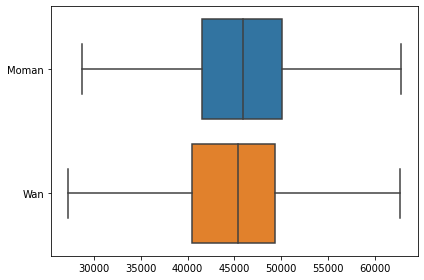

In [9]:
gini.viz

In [10]:
gini.ratio

0.05930674736868827

In [11]:
gini.sample

5000

__Geocode addresses__

In [12]:
small_data = data.sample(30)

In [13]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,employed_at_start,state,full_address,Address,City,State,Zip,id,start_month,end_month
8855,8856,Neptunian,Moman,33330.0,51554.0,44,French Literature,2013,2019,124,...,1,8,3424 SAINT JOHNS AVE PALATKA FL 32177,3424 SAINT JOHNS AVE,PALATKA,FL,32177,7678,10,5
6333,6334,Earthling,Moman,34850.0,43362.0,20,Anthropology,2014,2015,111,...,1,8,4259 WEST SWAMP ROAD SUITE 204 DOYLESTOWN PA 1...,4259 WEST SWAMP ROAD SUITE 204,DOYLESTOWN,PA,18902,5817,9,7
9984,9985,Martian,Moman,34274.0,47173.0,45,French Literature,2013,2015,125,...,1,8,520 EIGHTH AVENUE NEW YORK NY 10018,520 EIGHTH AVENUE,NEW YORK,NY,10018,1246,10,5
2165,2166,Neptunian,Moman,34627.0,39911.0,46,Philosophy,2018,2018,60,...,0,8,4540 AMBASSADOR CAFFERY PKWY SUITE B220 LAFAYE...,4540 AMBASSADOR CAFFERY PKWY SUITE B220,LAFAYETTE,LA,70508,5178,8,5
9902,9903,Venusian,Wan,41875.0,72738.0,22,French Literature,2013,2016,125,...,1,8,"5750 DIVISION STREET, SUITE 206 RIVERSIDE CA 9...","5750 DIVISION STREET, SUITE 206",RIVERSIDE,CA,92506,8949,8,7


In [14]:
small_data['geocode'] = external.Census.get_batch_geocode(small_data)

Successfully geocoded 76.67% of 30 passed addresses.
Of successfully matched addresses, 95.65% were exact matches


__Get SES for each individual with a geocode__

In [17]:
adi = equity.ADI()

In [18]:
small_data['ses'] = adi.get_quintile_for_geocodes_frame(small_data, 'geocode')

Geocode merge: Merged 23 of 7 observations in input dataframe (76.67%)


In [20]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,geocode,ses
8855,8856,Neptunian,Moman,33330.0,51554.0,44,French Literature,2013,2019,124,...,3424 SAINT JOHNS AVE PALATKA FL 32177,3424 SAINT JOHNS AVE,PALATKA,FL,32177,7678,10,5,121079507002,80-100
6333,6334,Earthling,Moman,34850.0,43362.0,20,Anthropology,2014,2015,111,...,4259 WEST SWAMP ROAD SUITE 204 DOYLESTOWN PA 1...,4259 WEST SWAMP ROAD SUITE 204,DOYLESTOWN,PA,18902,5817,9,7,420171045031,0-20
9984,9985,Martian,Moman,34274.0,47173.0,45,French Literature,2013,2015,125,...,520 EIGHTH AVENUE NEW YORK NY 10018,520 EIGHTH AVENUE,NEW YORK,NY,10018,1246,10,5,360610109001,0-20
2165,2166,Neptunian,Moman,34627.0,39911.0,46,Philosophy,2018,2018,60,...,4540 AMBASSADOR CAFFERY PKWY SUITE B220 LAFAYE...,4540 AMBASSADOR CAFFERY PKWY SUITE B220,LAFAYETTE,LA,70508,5178,8,5,220550014011,20-40
9902,9903,Venusian,Wan,41875.0,72738.0,22,French Literature,2013,2016,125,...,"5750 DIVISION STREET, SUITE 206 RIVERSIDE CA 9...","5750 DIVISION STREET, SUITE 206",RIVERSIDE,CA,92506,8949,8,7,060650312005,20-40


__Check out SES equity concerns__

In [22]:
theil_t = equity.Theil_T.from_dataframe(small_data, 'ses', 'earnings_end')

In [24]:
theil_t.calculate()

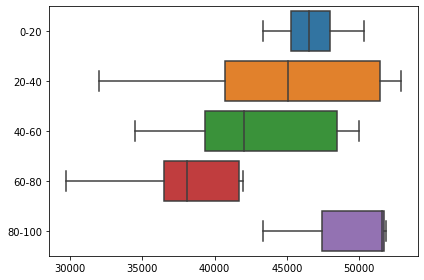

In [26]:
theil_t.viz

In [25]:
theil_t.ratio

0.2502953149846217

__Calculate average graduate wage__

__Adjust wages for inflation__

__Recalculate average graduate wage by program__

__Calculate earnings premium__

__Calculate employment premium__

__Calculate time to completion statistics__